<a href="https://colab.research.google.com/github/dourivaljunior/projetos-de-casos-reais/blob/main/estudo_caso_real_mercado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [283]:
# importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [284]:
from google.colab import files 
uploaded = files.upload()

Saving dataset_mercado.xlsx to dataset_mercado (1).xlsx


In [285]:
df_01 = pd.read_excel('dataset_mercado.xlsx',sheet_name='Mercado_Itapua_01')
df_02 = pd.read_excel('dataset_mercado.xlsx',sheet_name='Mercado_Bairro_da_Paz')
df_03 = pd.read_excel('dataset_mercado.xlsx',sheet_name='Mercado_Alto_Coqueirinho')
df_04 = pd.read_excel('dataset_mercado.xlsx',sheet_name='Mercado_Itapua_02')

In [286]:
#Localizando os mercados num mapa
# inserir as colunas latitude e longitude no dataset
import plotly.express as px
df_01[['lat','lon']]=[-12.9494627,-38.3667413]
df_02[['lat','lon']]=[-12.9306987,-38.3793571]
df_03[['lat','lon']]=[-12.939347,-38.3768625]
df_04[['lat','lon']]=[-12.9369896,-38.362665]
# concatenar os dataframes
df_lat_lon=pd.concat([df_01, df_02,df_03,df_04], axis=0, ignore_index=True)
data_mapa=df_lat_lon[['Localização','Bairro','Sexo','Linha_Produto','Custo_Total_Produtos','Quantidade_Produtos_Vendidos','Faturamento','Data','Tipo_Pagamento','lat','lon']]
mapa=px.scatter_mapbox(data_mapa,lat='lat',lon='lon',size='Faturamento',hover_name='Localização',hover_data='',color_discrete_sequence=['fuchsia'],zoom=13,height=250)
mapa.update_layout(mapbox_style='open-street-map')
mapa.update_layout(height=300,margin={'r':5,'t':5,'l':5,'b':5})
mapa.show()
df_concat=df_lat_lon
#

In [287]:
df_concat.head()

,Localização,Bairro,Sexo,Linha_Produto,Custo_Total_Produtos,Quantidade_Produtos_Vendidos,Faturamento,Data,Tipo_Pagamento,lat,lon
0,A,Itapuã,Homem,Bebidas,726,77,1241,2022-01-03,Cartão de crédito,-12.949463,-38.366741
1,A,Itapuã,Mulher,Utensílios para casa,457,98,1001,2022-01-03,dinheiro,-12.949463,-38.366741
2,A,Itapuã,Mulher,acessórios,658,95,1328,2022-01-03,dinheiro,-12.949463,-38.366741
3,A,Itapuã,Homem,Eletro Eletrônicos,747,70,1510,2022-01-03,dinheiro,-12.949463,-38.366741
4,A,Itapuã,Mulher,Saúde e Beleza,457,90,1133,2022-01-03,Cartão de Débito,-12.949463,-38.366741


In [288]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1228 entries, 0 to 1227
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Localização                   1228 non-null   object        
 1   Bairro                        1228 non-null   object        
 2   Sexo                          1228 non-null   object        
 3   Linha_Produto                 1228 non-null   object        
 4   Custo_Total_Produtos          1228 non-null   int64         
 5   Quantidade_Produtos_Vendidos  1228 non-null   int64         
 6   Faturamento                   1228 non-null   int64         
 7   Data                          1228 non-null   datetime64[ns]
 8   Tipo_Pagamento                1228 non-null   object        
 9   lat                           1228 non-null   float64       
 10  lon                           1228 non-null   float64       
dtypes: datetime64[ns](1), float64(

In [ ]:
#Análise exploratória de dados da rede de supermercados fort

In [289]:
# verficando como está o faturamento total por loja.
df_01=df_concat.groupby('Localização').agg({'Faturamento':'sum'}).reset_index()
df_01.head()

,Localização,Faturamento
0,A,613760
1,B,538193
2,C,625426
3,D,610896


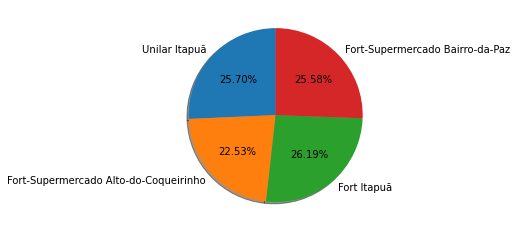

In [291]:
#fazendo um gráfico de pizza. #vai dar uma pequena diferença pois não considerei todas as 25 marcas , somente ocnsiderei 10.
X=['Unilar Itapuã','Fort-Supermercado Alto-do-Coqueirinho','Fort Itapuã','Fort-Supermercado Bairro-da-Paz']
Y=round(df_01['Faturamento'],1)
labels = X
sizes = Y
separate = (0,0,0,0)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes,explode=separate,labels=labels, autopct='%1.2f%%',shadow=True, startangle=90)
plt.show()

In [292]:
# Como está o tipo de pagamento por loja?
df_01=df_concat
df_02=df_01.groupby('Localização')["Tipo_Pagamento"].value_counts()
df_02

Localização  Tipo_Pagamento   
A            Cartão de crédito    239
             dinheiro              52
             Cartão de Débito      16
B            Cartão de crédito    254
             dinheiro              33
             Cartão de Débito      20
C            Cartão de crédito    231
             dinheiro              41
             Cartão de Débito      35
D            Cartão de crédito    246
             dinheiro              42
             Cartão de Débito      19
Name: Tipo_Pagamento, dtype: int64

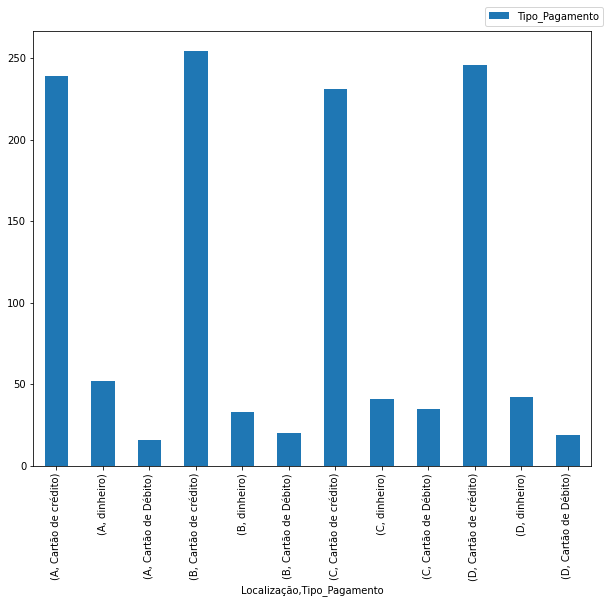

In [293]:
#fazendo um gráfico de barras
df_02.plot(kind="bar",stacked=True,figsize=(10,8))
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
plt.show()

In [294]:
df_concat.info()
df_01=df_concat

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1228 entries, 0 to 1227
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Localização                   1228 non-null   object        
 1   Bairro                        1228 non-null   object        
 2   Sexo                          1228 non-null   object        
 3   Linha_Produto                 1228 non-null   object        
 4   Custo_Total_Produtos          1228 non-null   int64         
 5   Quantidade_Produtos_Vendidos  1228 non-null   int64         
 6   Faturamento                   1228 non-null   int64         
 7   Data                          1228 non-null   datetime64[ns]
 8   Tipo_Pagamento                1228 non-null   object        
 9   lat                           1228 non-null   float64       
 10  lon                           1228 non-null   float64       
dtypes: datetime64[ns](1), float64(

In [295]:
df_01.head()

,Localização,Bairro,Sexo,Linha_Produto,Custo_Total_Produtos,Quantidade_Produtos_Vendidos,Faturamento,Data,Tipo_Pagamento,lat,lon
0,A,Itapuã,Homem,Bebidas,726,77,1241,2022-01-03,Cartão de crédito,-12.949463,-38.366741
1,A,Itapuã,Mulher,Utensílios para casa,457,98,1001,2022-01-03,dinheiro,-12.949463,-38.366741
2,A,Itapuã,Mulher,acessórios,658,95,1328,2022-01-03,dinheiro,-12.949463,-38.366741
3,A,Itapuã,Homem,Eletro Eletrônicos,747,70,1510,2022-01-03,dinheiro,-12.949463,-38.366741
4,A,Itapuã,Mulher,Saúde e Beleza,457,90,1133,2022-01-03,Cartão de Débito,-12.949463,-38.366741


In [296]:
df_03=df_01.groupby(['Localização','Linha_Produto']).agg({'Quantidade_Produtos_Vendidos':'sum'}).reset_index()
df_03

,Localização,Linha_Produto,Quantidade_Produtos_Vendidos
0,A,Alimentício,4285
1,A,Bebidas,4517
2,A,Eletro Eletrônicos,4331
3,A,Saúde e Beleza,4392
4,A,Utensílios para casa,4248
5,A,acessórios,4348
6,B,Alimentício,4304
7,B,Bebidas,4422
8,B,Eletro Eletrônicos,4377
9,B,Saúde e Beleza,4417


In [297]:
df_03_A=df_03[df_03['Localização']=='A']
df_03_B=df_03[df_03['Localização']=='B']
df_03_C=df_03[df_03['Localização']=='C']
df_03_D=df_03[df_03['Localização']=='D']
df_03_D

,Localização,Linha_Produto,Quantidade_Produtos_Vendidos
18,D,Alimentício,5309
19,D,Bebidas,5414
20,D,Eletro Eletrônicos,5274
21,D,Saúde e Beleza,5425
22,D,Utensílios para casa,5490
23,D,acessórios,5428


In [298]:
xA=df_03_A['Linha_Produto']
yA=df_03_A['Quantidade_Produtos_Vendidos']
xB=df_03_B['Linha_Produto']
yB=df_03_B['Quantidade_Produtos_Vendidos']
xC=df_03_C['Linha_Produto']
yC=df_03_C['Quantidade_Produtos_Vendidos']
xD=df_03_D['Linha_Produto']
yD=df_03_D['Quantidade_Produtos_Vendidos']

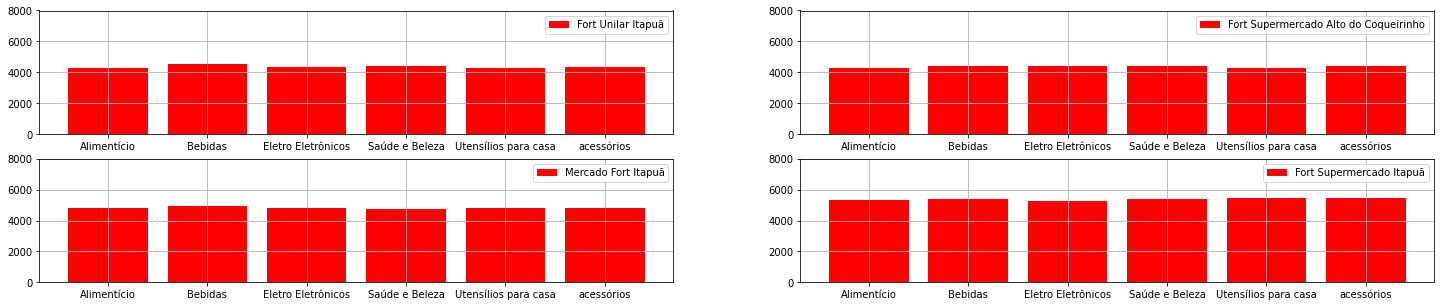

In [299]:
plt.figure(figsize = (25,5))
plt.subplot(2, 2, 1)
plt.bar(xA,yA,label = 'Fort Unilar Itapuã', color = 'r')
plt.legend()
plt.grid()
plt.ylim(0,8000)
plt.subplot(2, 2, 2)
plt.bar(xB,yB,label = 'Fort Supermercado Alto do Coqueirinho', color = 'r')
plt.legend()
plt.grid()
plt.ylim(0,8000)
plt.subplot(2, 2, 3)
plt.bar(xC,yC,label = 'Mercado Fort Itapuã', color = 'r')
plt.legend()
plt.grid()
plt.ylim(0,8000)
plt.subplot(2, 2, 4)
plt.bar(xD,yD,label = 'Fort Supermercado Itapuã', color = 'r')
plt.legend()
plt.grid()
plt.ylim(0,8000)
plt.show()

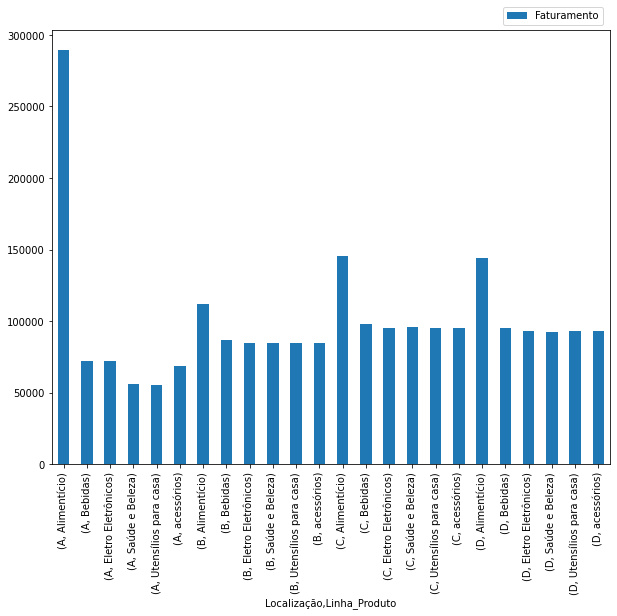

In [300]:
df_03=df_01.groupby(['Localização','Linha_Produto']).agg({'Faturamento':'sum'})
df_03.plot(kind="bar",stacked=True,figsize=(10,8))
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
plt.show()

In [301]:
df_04=df_01.groupby(['Localização','Linha_Produto']).agg({'Quantidade_Produtos_Vendidos':'sum','Faturamento':'sum'}).reset_index()
df_04

,Localização,Linha_Produto,Quantidade_Produtos_Vendidos,Faturamento
0,A,Alimentício,4285,289270
1,A,Bebidas,4517,72036
2,A,Eletro Eletrônicos,4331,71920
3,A,Saúde e Beleza,4392,56490
4,A,Utensílios para casa,4248,55577
5,A,acessórios,4348,68467
6,B,Alimentício,4304,112232
7,B,Bebidas,4422,86555
8,B,Eletro Eletrônicos,4377,85133
9,B,Saúde e Beleza,4417,84602


In [302]:
df_04_A=df_04[df_04['Localização']=='A']
df_04_A=df_04_A.sort_values('Faturamento',ascending=False)
df_04_B=df_04[df_04['Localização']=='B']
df_04_B=df_04_B.sort_values('Faturamento',ascending=False)
df_04_C=df_04[df_04['Localização']=='C']
df_04_C=df_04_C.sort_values('Faturamento',ascending=False)
df_04_D=df_04[df_04['Localização']=='D']
df_04_D=df_04_D.sort_values('Faturamento',ascending=False)
df_04_A

,Localização,Linha_Produto,Quantidade_Produtos_Vendidos,Faturamento
0,A,Alimentício,4285,289270
1,A,Bebidas,4517,72036
2,A,Eletro Eletrônicos,4331,71920
5,A,acessórios,4348,68467
3,A,Saúde e Beleza,4392,56490
4,A,Utensílios para casa,4248,55577


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning

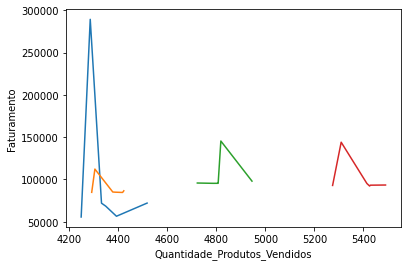

In [303]:
sns.lineplot(df_04_A['Quantidade_Produtos_Vendidos'], df_04_A['Faturamento'])
sns.lineplot(df_04_B['Quantidade_Produtos_Vendidos'], df_04_B['Faturamento'])
sns.lineplot(df_04_C['Quantidade_Produtos_Vendidos'], df_04_C['Faturamento'])
sns.lineplot(df_04_D['Quantidade_Produtos_Vendidos'], df_04_D['Faturamento'])
plt.show()

In [304]:
df_05=df_01.groupby(['Localização','Sexo']).agg({'Quantidade_Produtos_Vendidos':'sum','Faturamento':'sum'}).reset_index()
df_05_A=df_05[df_05['Localização']=='A']
df_05_A=df_05_A.sort_values('Faturamento',ascending=False)
df_05_B=df_05[df_05['Localização']=='B']
df_05_B=df_05_B.sort_values('Faturamento',ascending=False)
df_05_C=df_05[df_05['Localização']=='C']
df_05_C=df_05_C.sort_values('Faturamento',ascending=False)
df_05_D=df_05[df_05['Localização']=='D']
df_05_D=df_05_D.sort_values('Faturamento',ascending=False)
df_05_A
df_05

,Localização,Sexo,Quantidade_Produtos_Vendidos,Faturamento
0,A,Homem,8848,143956
1,A,Mulher,17273,469804
2,B,Homem,8799,171688
3,B,Mulher,17399,366505
4,C,Homem,9752,193416
5,C,Mulher,19130,432010
6,D,Homem,10688,188075
7,D,Mulher,21652,422821


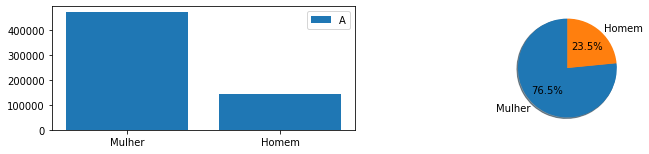

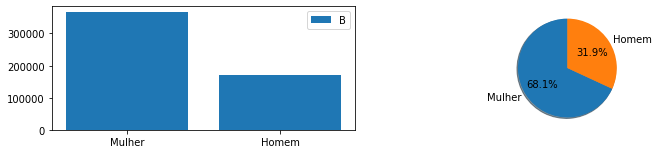

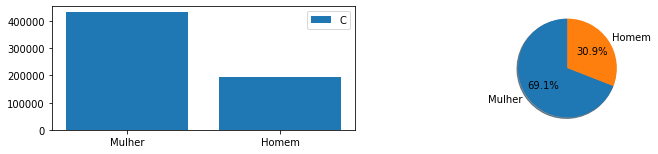

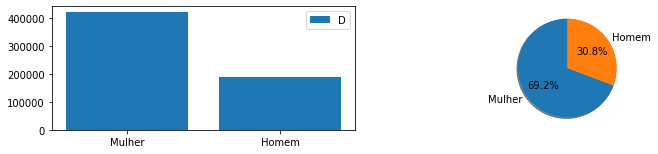

In [305]:
plt.figure(figsize = (25,5))
plt.subplot(2, 4, 1)
plt.bar(df_05_A['Sexo'], df_05_A['Faturamento'],label='A')
plt.legend()
plt.subplot(2, 4, 2)
plt.pie(df_05_A['Faturamento'],labels=df_05_A['Sexo'],explode=(0,0),autopct='%1.1f%%',shadow=True, startangle=90)
plt.figure(figsize = (25,5))
plt.subplot(2, 4, 3)
plt.bar(df_05_B['Sexo'], df_05_B['Faturamento'],label='B')
plt.legend()
plt.subplot(2, 4, 4)
plt.pie(df_05_B['Faturamento'],labels=df_05_B['Sexo'],explode=(0,0),autopct='%1.1f%%',shadow=True, startangle=90)
plt.figure(figsize = (25,5))
plt.subplot(2, 4, 5)
plt.bar(df_05_C['Sexo'], df_05_C['Faturamento'],label='C')
plt.legend()
plt.subplot(2, 4, 6)
plt.pie(df_05_C['Faturamento'],labels=df_05_C['Sexo'],explode=(0,0),autopct='%1.1f%%',shadow=True, startangle=90)
plt.figure(figsize = (25,5))
plt.subplot(2, 4, 7)
plt.bar(df_05_D['Sexo'], df_05_D['Faturamento'],label='D')
plt.legend()
plt.subplot(2, 4, 8)
plt.pie(df_05_D['Faturamento'],labels=df_05_D['Sexo'],explode=(0,0),autopct='%1.1f%%',shadow=True, startangle=90)
plt.show()

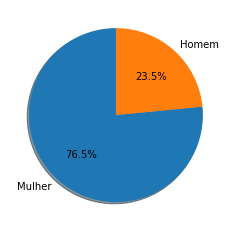

In [306]:
plt.pie(df_05_A['Faturamento'],labels=df_05_A['Sexo'],explode=(0,0),autopct='%1.1f%%',shadow=True, startangle=90)
plt.show()

In [307]:
df_01['Data'] =pd.to_datetime(df_01['Data'])
# df_06=df_01[['Data','Faturamento']]
# df_06.head()
data_dia =df_01['Data'].dt.day_name()
data_dia.head()
#from datetime import date
data_dia =df_01['Data'].dt.day_name()
#segunda=0,terça=1,quarta=2,quinta=3,sexta=4,sábado=5,domingo=6
df221=data_dia
df221=df221.loc[df221=='Sunday']
df221.count()

24

In [327]:
df_11=df_concat.groupby(['Data']).agg({'Quantidade_Produtos_Vendidos':'mean'}).reset_index()
df_11_mean=df_11.mean()
df_11_mean

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



Quantidade_Produtos_Vendidos    92.531548
dtype: float64

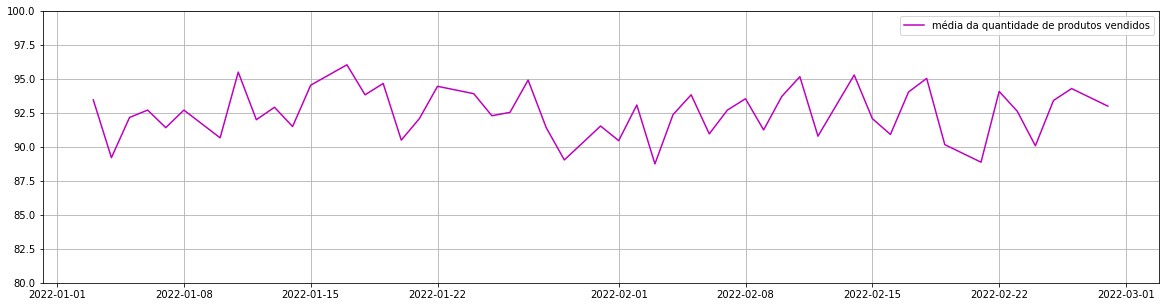

In [332]:
plt.figure(figsize = (20,5))
plt.plot(df_11['Data'],df_11['Quantidade_Produtos_Vendidos'],label='média da quantidade de produtos vendidos',color='m')
plt.legend()
plt.grid()
plt.ylim(80,100)
plt.show()

In [263]:
df_06.sort_values('Quantidade_Produtos_Vendidos',ascending=True)
df_06.head()

,Data,Quantidade_Produtos_Vendidos,Faturamento
0,2022-01-03,2243,46138
1,2022-01-04,2141,47017
2,2022-01-05,2212,46883
3,2022-01-06,2225,46797
4,2022-01-07,2194,47201


In [240]:
df_06['dia']=data_dia
df_06.head(10)

,Data,Quantidade_Produtos_Vendidos,Faturamento,dia
0,2022-01-03,2243,46138,Monday
1,2022-01-04,2141,47017,Monday
2,2022-01-05,2212,46883,Monday
3,2022-01-06,2225,46797,Monday
4,2022-01-07,2194,47201,Monday
5,2022-01-08,2225,47221,Monday
6,2022-01-10,2176,46884,Tuesday
7,2022-01-11,2292,47147,Tuesday
8,2022-01-12,2208,46307,Tuesday
9,2022-01-13,2230,47719,Tuesday


In [241]:
#verificando se tem algum dia melhor para venda

In [242]:
df_06=df_06.groupby(['dia']).agg({'Quantidade_Produtos_Vendidos':'sum','Faturamento':'sum'}).reset_index()
df_06.head(7)

,dia,Quantidade_Produtos_Vendidos,Faturamento
0,Friday,13567,285842
1,Monday,26636,561194
2,Saturday,13376,283499
3,Thursday,15436,323009
4,Tuesday,26553,561313
5,Wednesday,17973,373418


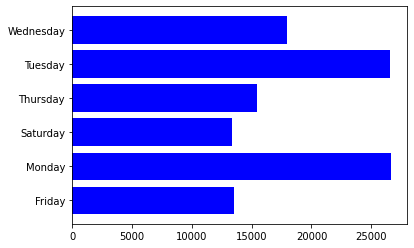

In [243]:
fig, ax = plt.subplots()
ax.barh(df_06['dia'],df_06['Quantidade_Produtos_Vendidos'],color='b', label='N')
plt.show()

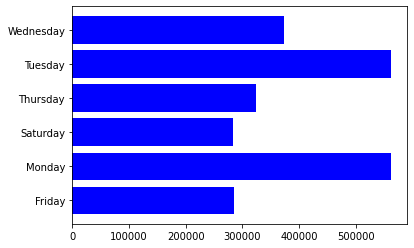

In [244]:
fig, ax = plt.subplots()
ax.barh(df_06['dia'],df_06['Faturamento'],color='b', label='N')
plt.show()

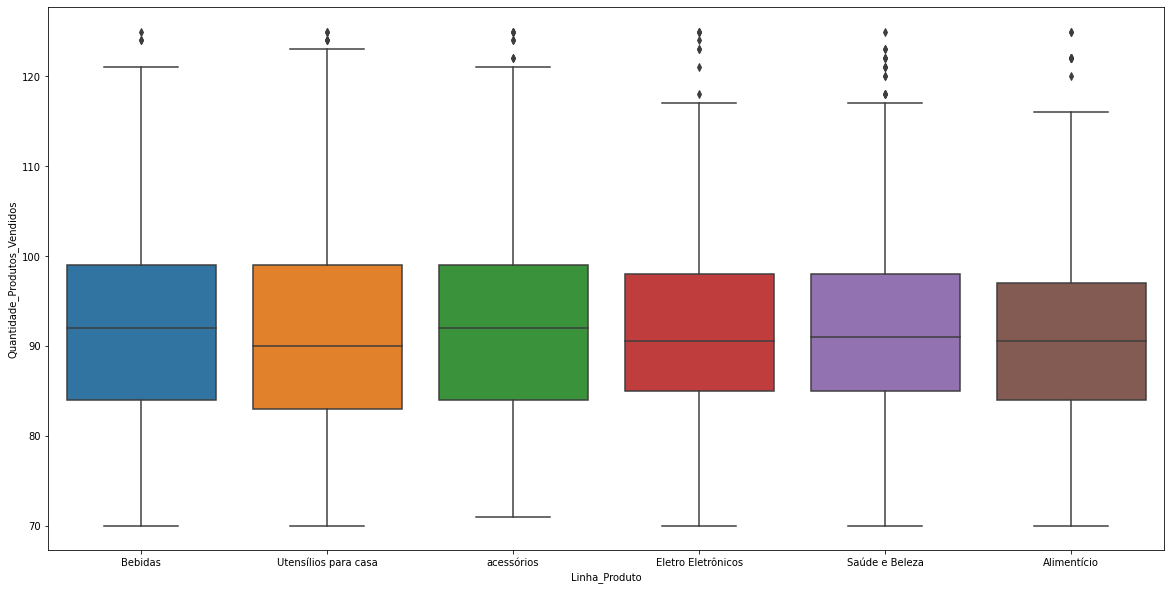

In [245]:
# verificando se tem outliers no dataset
plt.figure(figsize = (20,10))
sns.boxplot(x=df_01['Linha_Produto'], y=df_01['Quantidade_Produtos_Vendidos'])
plt.show()


In [246]:
#realizando algumas estatísticas:
df07=df_01.groupby('Linha_Produto')['Quantidade_Produtos_Vendidos'].agg(['mean']).reset_index()
df07.head()

,Linha_Produto,mean
0,Alimentício,91.745098
1,Bebidas,92.778846
2,Eletro Eletrônicos,92.102941
3,Saúde e Beleza,92.921569
4,Utensílios para casa,92.230392


In [333]:
#continua